## Customers Segmentation of  Online Retail Sales

### 1. Data Extraction

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [18]:
df = pd.read_excel("Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### 2. Exploratory Data Analysis

In [19]:
print (df.columns)
df.describe().T

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [20]:
#remove null values 
df.dropna(axis=0, subset=["CustomerID"], inplace=True)
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [21]:
print("number of duplicated entriees :{}".format(df.duplicated().sum()))
df.drop_duplicates(inplace=True)

number of duplicated entriees :5225


Text(0,0.5,'Total number')

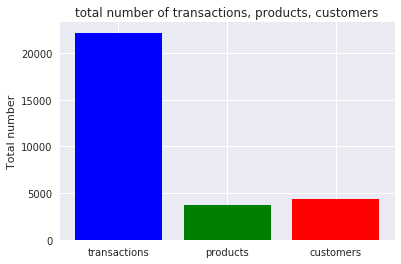

In [22]:
#total number of transactions, products, customers
nbTran= len(df.InvoiceNo.unique())
nbProd = len(df.StockCode.unique())
nbCustom= len(df.CustomerID.unique())
plt.bar(["transactions", "products", "customers"],[nbTran,nbProd , nbCustom], color=["blue", "green", "red"])
plt.title('total number of transactions, products, customers')
plt.ylabel('Total number')


Text(0.5,1,'total number of valide and canceled transactions')

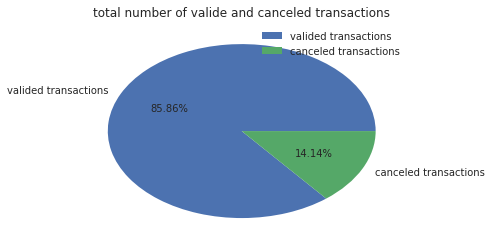

In [23]:
#total number of valided and canceled transactions
vtrans=len(df.InvoiceNo.unique())
ctrans= len([i for i in df.InvoiceNo.unique() if str(i).startswith('C')])
plt.pie([vtrans, ctrans], labels=["valided transactions", "canceled transactions"], autopct="%1.2f%%")
plt.legend()
plt.title("total number of valide and canceled transactions")

### 3. Data Cleaning and Feature Engineering

In [24]:
#remove canceled transactions
df.drop(df[df["InvoiceNo"].apply(lambda x:str(x).startswith('C'))].index, axis=0, inplace=True)

In [25]:
# create Price feature
df['TotalPrice'] = df['UnitPrice']*df['Quantity']
df[:5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [26]:
# average price per transactions and customer 
totalPrice= df.groupby(['CustomerID', 'InvoiceNo'])[['TotalPrice']].sum()
df1 =totalPrice.groupby(['CustomerID']).sum()
scaler = StandardScaler()
totalPrice_scaled = scaler.fit_transform(df1)
df1 =pd.DataFrame(data= totalPrice_scaled, index=df1.index, columns=df1.columns)

In [39]:
# create Freq feature
df1['Freq']= df.groupby(['CustomerID', 'InvoiceNo'])['InvoiceNo'].count().groupby(['CustomerID']).count()
df1.head()

,TotalPrice,Freq,Duration,Country
CustomerID,,,,
12346.0,8.363977,1,-0.987840,-0.234032
12347.0,0.251779,7,1.776810,3.912979
12348.0,-0.027938,4,1.148136,5.295316
12349.0,-0.032357,1,-0.987840,2.807109
12350.0,-0.190780,1,-0.987840,1.148305


In [28]:
df.loc[:10,['CustomerID', 'InvoiceNo', 'InvoiceDate']]

,CustomerID,InvoiceNo,InvoiceDate
0,17850.0,536365,2010-12-01 08:26:00
1,17850.0,536365,2010-12-01 08:26:00
2,17850.0,536365,2010-12-01 08:26:00
3,17850.0,536365,2010-12-01 08:26:00
4,17850.0,536365,2010-12-01 08:26:00
5,17850.0,536365,2010-12-01 08:26:00
6,17850.0,536365,2010-12-01 08:26:00
7,17850.0,536366,2010-12-01 08:28:00
8,17850.0,536366,2010-12-01 08:28:00
9,13047.0,536367,2010-12-01 08:34:00


In [41]:
# create Duration feature

#df.groupby(['CustomerID', 'InvoiceNo'], as_index=True)['InvoiceDate'].first()
g1 =df.groupby(['CustomerID', 'InvoiceNo'], 
               as_index=True).agg({"InvoiceDate": "first"}).groupby(['CustomerID'], 
                                                                    as_index=True).agg({"InvoiceDate": [lambda x: max(x)-min(x)]})
g1.columns = g1.columns.droplevel(level=0 )
g1.rename(columns={"<lambda>":"Duration"}, inplace=True)
df1["Duration"]=(g1 / np.timedelta64(1, 'D')).astype(int)
#df1[ df1["Duration"]==0]= 1
scaler = StandardScaler()
totalPrice_scaled = scaler.fit_transform(df1)
df1 =pd.DataFrame(data= totalPrice_scaled, index=df1.index, columns=df1.columns)
df1.head()

/home/merabet/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/merabet/miniconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,TotalPrice,Freq,Duration,Country
CustomerID,,,,
12346.0,8.363977,-0.424675,-0.987840,-0.234032
12347.0,0.251779,0.354080,1.776810,3.912979
12348.0,-0.027938,-0.035297,1.148136,5.295316
12349.0,-0.032357,-0.424675,-0.987840,2.807109
12350.0,-0.190780,-0.424675,-0.987840,1.148305


### 4. Clustering

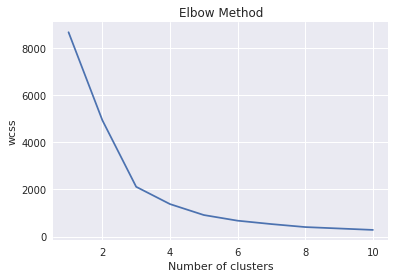

In [42]:
# find the optimal number of clusters 
wcss= []
#X= df1[["TotalPrice" , "Duration", "freq" ]]
X= df1[["Duration" , "TotalPrice"]]
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [45]:
##Fitting kmeans to the dataset with k=4
km4=KMeans(n_clusters=4,init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km4.fit_predict(X)
print(y_means)

[3 2 2 ... 0 2 2]


### 5. Customers segments Visualisation

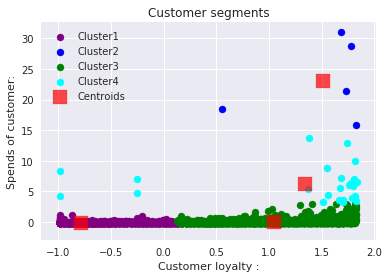

In [46]:
#Visualizing the clusters for k=4
plt.scatter(X.iloc[y_means==0,0],X.iloc[y_means==0,1],s=50, c='purple',label='Cluster1')
plt.scatter(X.iloc[y_means==1,0],X.iloc[y_means==1,1],s=50, c='blue',label='Cluster2')
plt.scatter(X.iloc[y_means==2,0],X.iloc[y_means==2,1],s=50, c='green',label='Cluster3')
plt.scatter(X.iloc[y_means==3,0],X.iloc[y_means==3,1],s=50, c='cyan',label='Cluster4')
#plt.scatter(X.iloc[y_means==4,0],X.iloc[y_means==4,1],s=50, c='pink',label='Cluster5')

plt.scatter(km4.cluster_centers_[:,0], km4.cluster_centers_[:,1],s=200,marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Customer loyalty :')
plt.ylabel('Spends of customer:')
plt.legend()
plt.show()